<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('C:\\Users\\ro44\\Desktop\\DAT-course-materials-students-master\\lessons\\working-with-data')

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [71]:
movies=pd.read_csv('.\\imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [72]:
# Answermovies = pd.read_csv('./data/imdb_1000.csv')
movies.shape

(979, 6)

#### Check the data type of each column.

In [73]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [74]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [75]:
# Answer:
movies.duration.sort_values()

389     64
338     66
258     67
293     68
88      68
      ... 
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

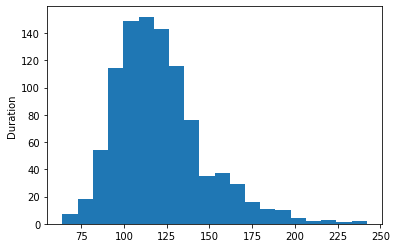

In [76]:
# Answer:
movies.duration.plot(kind='hist', bins=20)
plt.ylabel('Duration');


#### Use a box plot to display that same data.

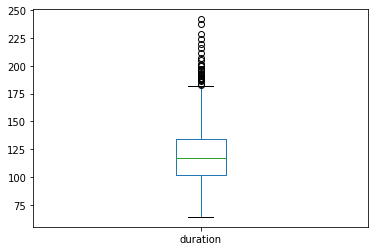

In [77]:
# Answer:
movies.duration.plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [78]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

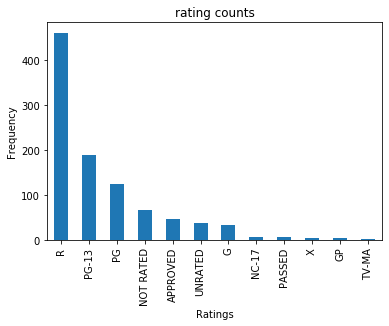

In [79]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar',title='rating counts')
plt.xlabel('Ratings');
plt.ylabel('Frequency');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [80]:
#movies.rename(columns={"NOT RATED": "UNRATED", "APPROVED": "NOT RATED","PASSED":"UNRATED","GP":"UNRATED"})
#movies['content_rating'].replace({"NOT RATED": "UNRATED", "APPROVED": "UNRATED","PASSED":"UNRATED","GP":"UNRATED"})
film=movies.replace(to_replace =["NOT RATED","APPROVED","PASSED","APPROVED","GP"] ,
                 value ="UNRATED")
film.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [81]:
# Answer:
film=movies.replace(to_replace =["X","TV_MA"] ,
                 value ="NC-17")
film.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         11
PASSED         7
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [96]:
# Answer:
film.isnull().sum()


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [102]:
# Answer:
#film.isnull("content_rating")
df1 = film[film.isna().any(axis=1)]
df1.head()


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [110]:
# Answer:
print(film[film['duration'] > 120].mean())
print(film[film['duration'] < 120].mean())

star_rating      7.953670
duration       143.385321
dtype: float64
star_rating      7.838667
duration       102.405714
dtype: float64


#### Use a visualization to detect whether there is a relationship between duration and star rating.

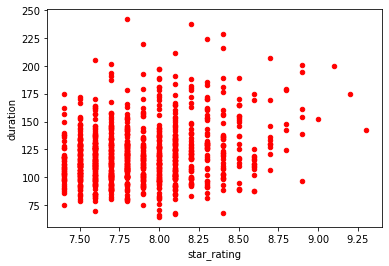

0.22714918343059212


In [116]:
# Answer:
film.plot(kind='scatter',x='star_rating',y='duration',color='red')
plt.show()
print(film['star_rating'].corr(film['duration']))


#### Calculate the average duration for each genre.

In [145]:
# Answer:
film.groupby(['genre']).duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

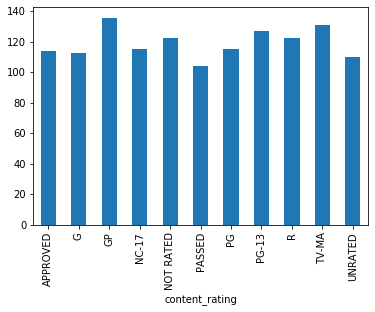

In [146]:
# Answer:
z=film.groupby(['content_rating']).duration.mean().plot(kind='bar')
#film.plot(kind='bar',x='content_rating',y='z',color='red')


#### Determine the top rated movie (by star rating) for each genre.

In [152]:
# Answer:
film.groupby('genre').max()

,star_rating,title,duration,actors_list
genre,,,,
Action,9.0,Yojimbo,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [249]:
# Answer:
y=film[film.title.duplicated(keep=False)]
print(y)
#df[df.values  == "banana"]
y[y.title == "True Grit"].iloc[0:1]
y[y.title == "True Grit"].iloc[1:2]


     star_rating                            title content_rating      genre  \
466          7.9  The Girl with the Dragon Tattoo              R      Crime   
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
662          7.7                        True Grit          PG-13  Adventure   
678          7.7                   Les Miserables          PG-13      Drama   
703          7.6                          Dracula       APPROVED     Horror   
905          7.5                          Dracula              R     Horror   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit            NaN  Adventure   

     duration                                        actors_list  
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
662       110  [u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...  
678       158  [u'Hu

,star_rating,title,content_rating,genre,duration,actors_list
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies
sized=film.groupby('genre').size()
sized_10=sized[sized>10]
#film.groupby('genre')[sized_10].mean()

#### Option 1: manually create a list of relevant genres, then filter using that list

In [304]:
# Answer:


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [311]:
# Answer:
film.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

## Bonus

#### Figure out something "interesting" using the actors data!